In [28]:
%pylab inline

import pandas as pd
import pandas_datareader.data as web
import scipy.stats as stat

rcParams['figure.figsize'] = (12,8)
rcParams['axes.grid'] = True

Populating the interactive namespace from numpy and matplotlib


In [74]:
A = 'PG'
px = web.get_data_yahoo(['^GSPC',A],'2005-11-27','2019-11-27').Close
logR = np.log(px/px.shift(1))

In [75]:
N = 252
variance = ((logR**2).rolling(N).sum()*252/N).iloc[N:]
correls  = logR.rolling(N).corr()[A].xs('^GSPC',level=1).iloc[N:]
betas    = correls*np.sqrt(variance[A]/variance['^GSPC'])
disps    = np.sqrt(np.abs(variance[A] - variance['^GSPC']))
spreads  = np.sqrt(variance[A]) - np.sqrt(variance['^GSPC'])
idiosync = variance[A] - (betas**2)*variance['^GSPC']

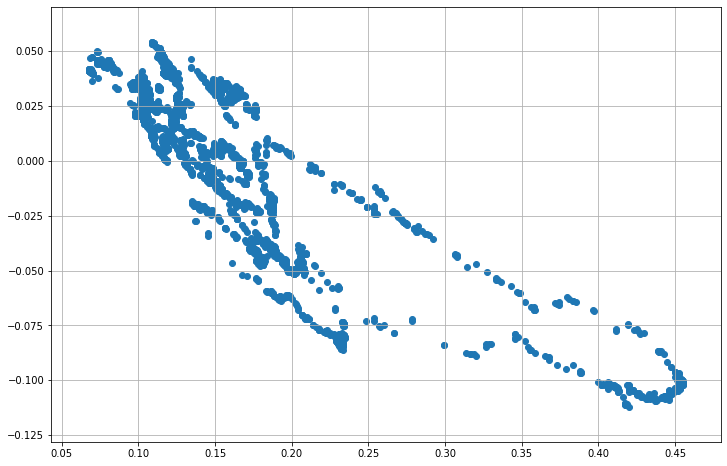

In [76]:
scatter(np.sqrt(variance['^GSPC']),spreads)

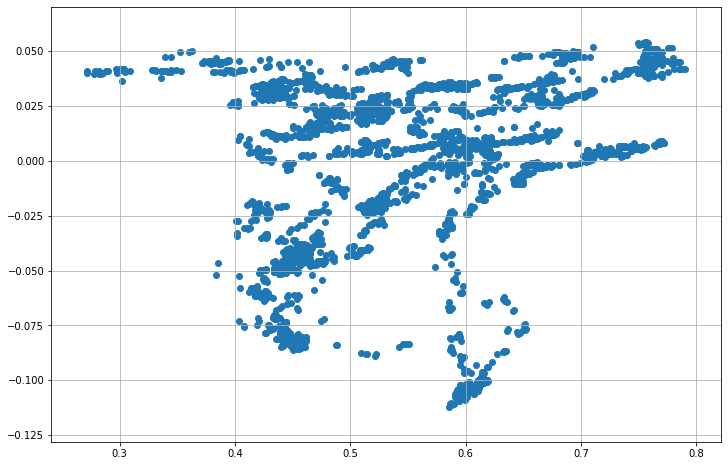

In [77]:
scatter(betas,spreads)

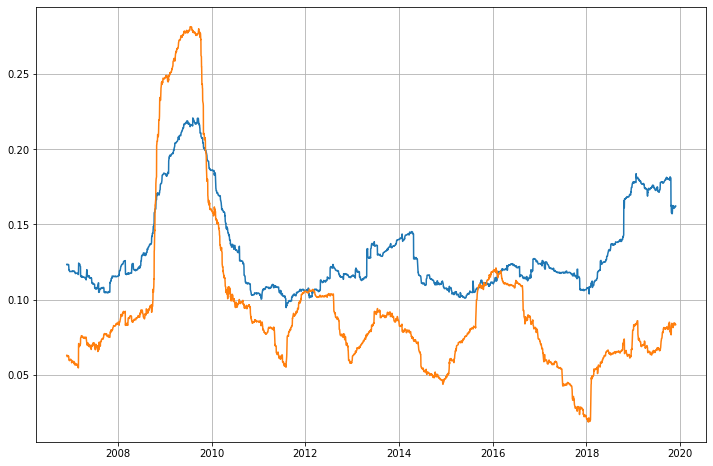

In [78]:
plot(np.sqrt(idiosync))
plot(np.sqrt(betas**2*variance['^GSPC']))

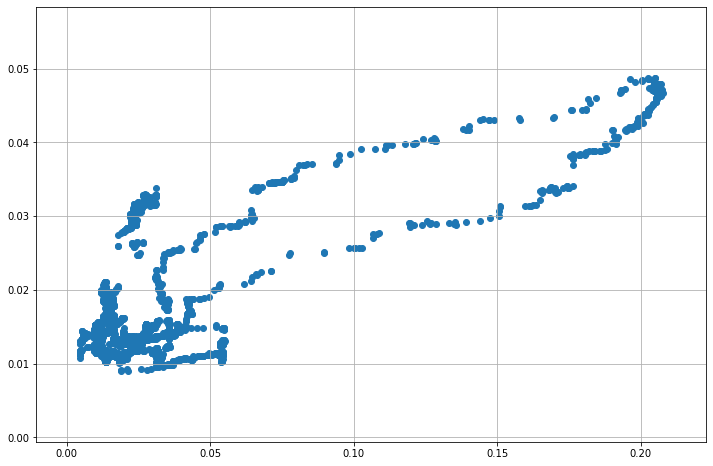

In [79]:
scatter(variance['^GSPC'],idiosync)

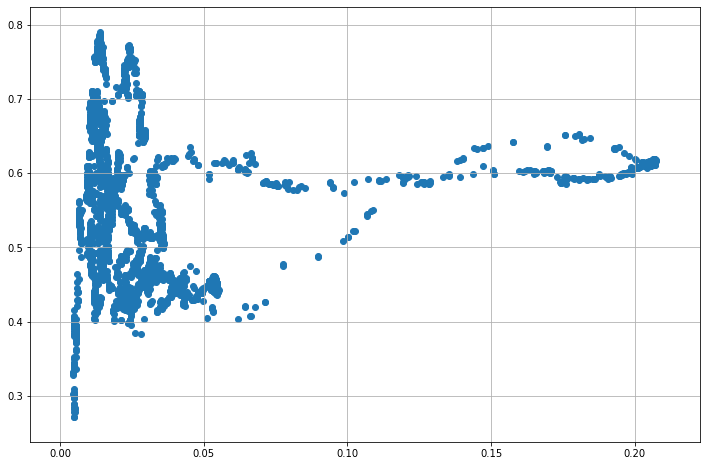

In [80]:
scatter(variance['^GSPC'],betas)

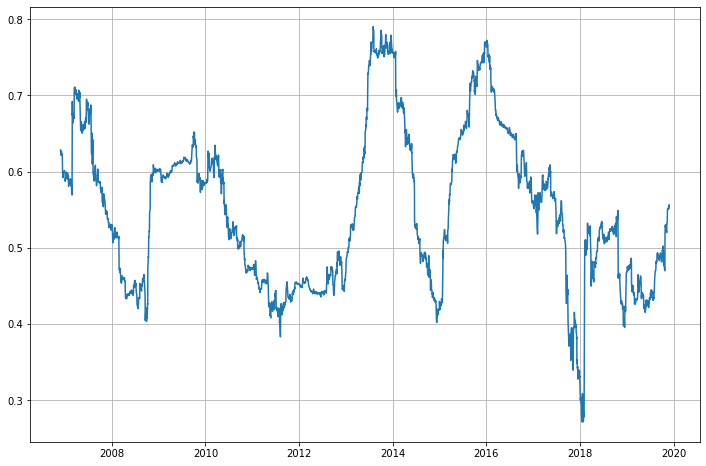

In [81]:
plot(betas)